In [71]:
import numpy as np
import math
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

In [4]:
num_nodes = 5

In [28]:
def getAvgs(file, num_nodes):
    values = []
    # get all values
    for i in range(1,num_nodes+1):
        values.append(np.loadtxt("{}{}.txt".format(file, i)))
    
    avg_v = []
    # avg them
    for i in range(len(values[0])):
        s = 0
        for t in range(num_nodes):
            s += values[t][i]
        s /= num_nodes
        #print('Avg error {}'.format(s))
        avg_v.append(s)
        
    return avg_v

In [92]:
eabps = getAvgs('abps/e', num_nodes)
tabps = getAvgs('abps/t', num_nodes)
etbps = getAvgs('atps/e', num_nodes)
ttbps = getAvgs('atps/t', num_nodes)

eabsw = getAvgs('absw/e', num_nodes)
tabsw = getAvgs('absw/t', num_nodes)
etbsw = getAvgs('atsw/e', num_nodes)
ttbsw = getAvgs('atsw/t', num_nodes)

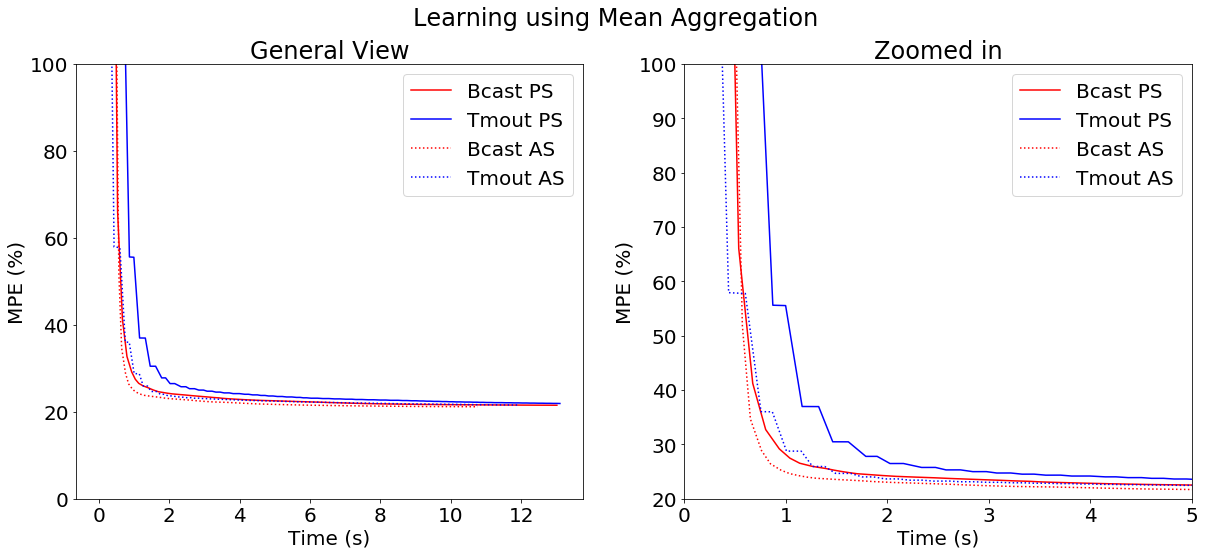

In [113]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 8))

ax1.plot(tabps, eabps, 'r', label="Bcast PS")
ax1.plot(ttbps, etbps, 'b', label="Tmout PS")
ax1.plot(tabsw, eabsw, 'r:', label="Bcast AS")
ax1.plot(ttbsw, etbsw, 'b:', label="Tmout AS")
ax1.set_ylim([0,100])
ax1.legend()
ax1.set_title('General View')
ax1.set_ylabel('MPE (%)')
ax1.set_xlabel('Time (s)')

ax2.plot(tabps, eabps, 'r', label="Bcast PS")
ax2.plot(ttbps, etbps, 'b', label="Tmout PS")
ax2.plot(tabsw, eabsw, 'r:', label="Bcast AS")
ax2.plot(ttbsw, etbsw, 'b:', label="Tmout AS")
ax2.set_ylim([20,100])
ax2.set_xlim([0,5])
ax2.set_title('Zoomed in')
ax2.set_ylabel('MPE (%)')
ax2.set_xlabel('Time (s)')

fig.suptitle('Learning using Mean Aggregation')
ax2.legend()
plt.show()
fig.savefig('train-time-mean.png')

In [75]:
embps = getAvgs('mbps/e', num_nodes)
tmbps = getAvgs('mbps/t', num_nodes)
emtps = getAvgs('mtps/e', num_nodes)
tmtps = getAvgs('mtps/t', num_nodes)

embsw = getAvgs('mbsw/e', num_nodes)
tmbsw = getAvgs('mbsw/t', num_nodes)
emtsw = getAvgs('mtsw/e', num_nodes)
tmtsw = getAvgs('mtsw/t', num_nodes)

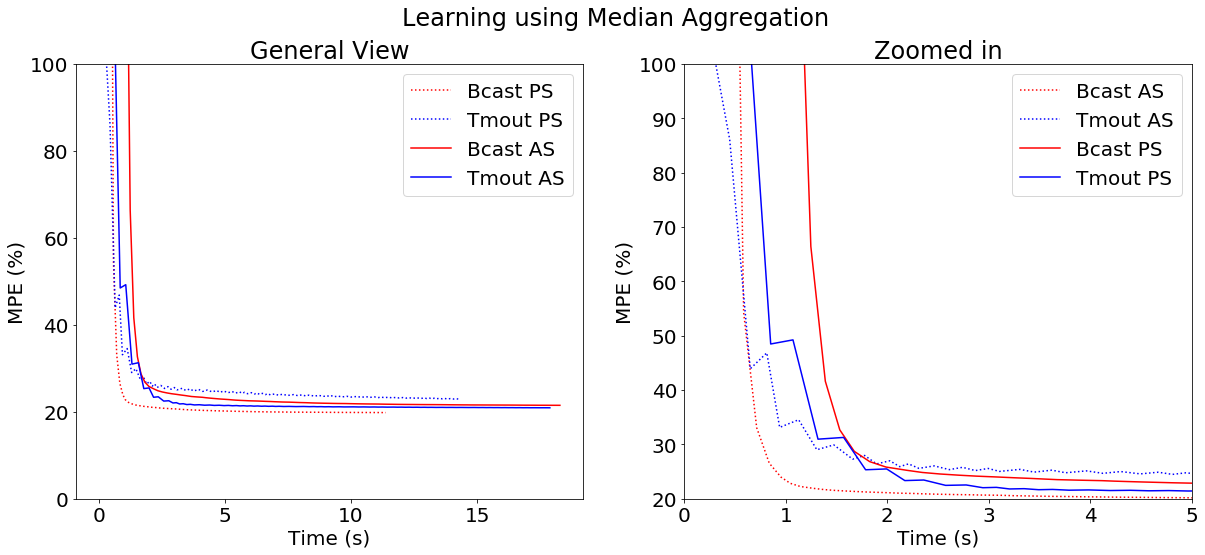

In [114]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 8))

ax1.plot(tmbps, embps, 'r:', label="Bcast PS")
ax1.plot(tmtps, emtps, 'b:', label="Tmout PS")
ax1.plot(tmbsw, embsw, 'r', label="Bcast AS")
ax1.plot(tmtsw, emtsw, 'b', label="Tmout AS")
ax1.set_ylim([0,100])
ax1.legend()
ax1.set_title('General View')
ax1.set_ylabel('MPE (%)')
ax1.set_xlabel('Time (s)')

ax2.plot(tmbps, embps, 'r:', label="Bcast AS")
ax2.plot(tmtps, emtps, 'b:', label="Tmout AS")
ax2.plot(tmbsw, embsw, 'r', label="Bcast PS")
ax2.plot(tmtsw, emtsw, 'b', label="Tmout PS")
ax2.set_ylim([20,100])
ax2.set_xlim([0,5])
ax2.set_title('Zoomed in')
ax2.set_ylabel('MPE (%)')
ax2.set_xlabel('Time (s)')

fig.suptitle('Learning using Median Aggregation')
ax2.legend()
plt.show()
fig.savefig('train-time-median.png')

In [98]:
mbe = getAvgs('mb/error-', num_nodes-2)
mbt = getAvgs('mb/time-', num_nodes-2)
abe = getAvgs('ab/error-', num_nodes-2)
abt = getAvgs('ab/time-', num_nodes-2)

mte = getAvgs('mt/error-', num_nodes-2)
mtt = getAvgs('mt/time-', num_nodes-2)
ate = getAvgs('at/error-', num_nodes-2)
att = getAvgs('at/time-', num_nodes-2)

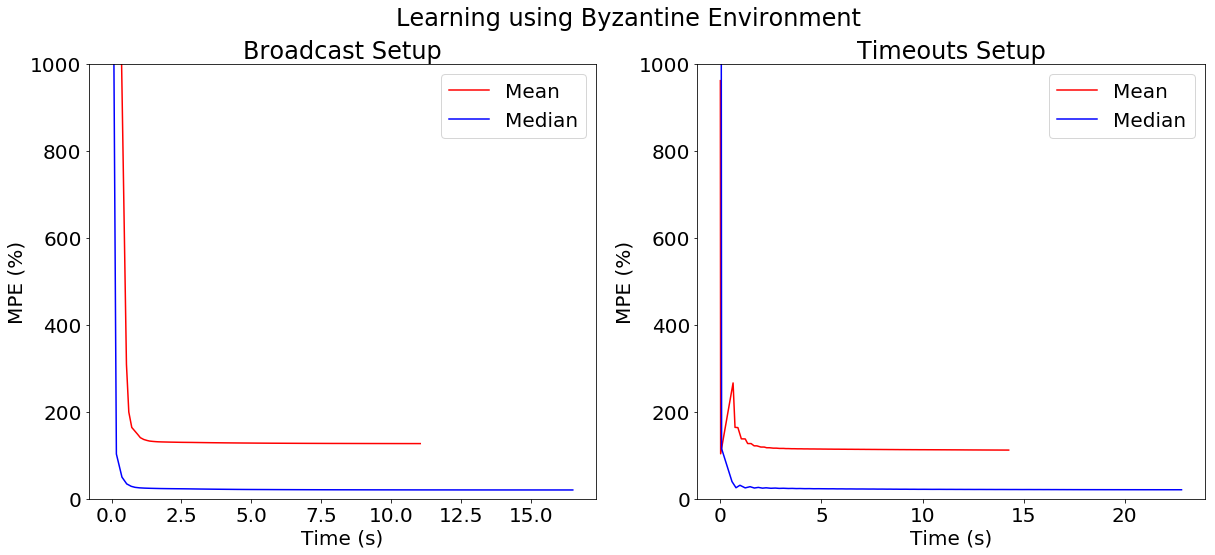

In [115]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 8))

ax1.plot(abt, abe, 'r', label="Mean")
ax1.plot(mbt, mbe, 'b', label="Median")
ax1.legend()
ax1.set_ylim([0,1000])
ax1.set_title('Broadcast Setup')
ax1.set_ylabel('MPE (%)')
ax1.set_xlabel('Time (s)')

ax2.plot(att, ate, 'r', label="Mean")
ax2.plot(mtt, mte, 'b', label="Median")
ax2.set_ylim([0,1000])
ax2.set_title('Timeouts Setup')
ax2.set_ylabel('MPE (%)')
ax2.set_xlabel('Time (s)')

fig.suptitle('Learning using Byzantine Environment')
ax2.legend()
plt.show()
fig.savefig('train-byz.png')